# Global mean Sea Surface Temperatures

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import platform
import os

plt.rcParams['figure.figsize'] = (10, 4)

#### Settings

In [127]:
year1=1982
year2=1992

In [128]:
#To compute de climatoloy
yearC1='1982'
yearC2='1992'

## Load data

In [129]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    base_file = '/Users/pvb/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
elif os.uname().nodename.lower().find('rossby') != -1:
    base_file = '/data/shareddata/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
    dataDir = '/home/pvb/Analisis/SSTGlobalAnalysis/data'

In [130]:
files = [f'{base_file}.{year}.nc' for year in range(year1, year2+1)]
DS = xr.open_mfdataset(files)

In [131]:
# Load data1

#titulo_short = 'NH'
#titulo = 'Northern hemisphere'
#sst = DS.sst.sel(lat=slice(0,80))

#titulo_short = 'SH'
#titulo = 'Southern hemisphere'
#sst = DS.sst.sel(lat=slice( -80, 0))

titulo_short = 'NAtl'
titulo = 'North Atlantic'
sst = DS.sst.sel(lat = slice( 0, 80), lon = slice( 260, 360))

#titulo_short = 'NTenerife'
#titulo = 'North Tenerife'
#sst = DS.sst.sel(lon=slice(360-16.,360-15.),lat=slice(28.50,28.75))

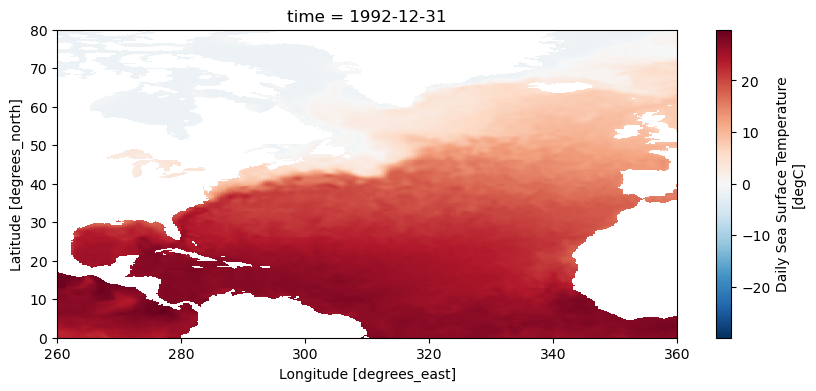

In [132]:
sst[-1,:,:].plot()

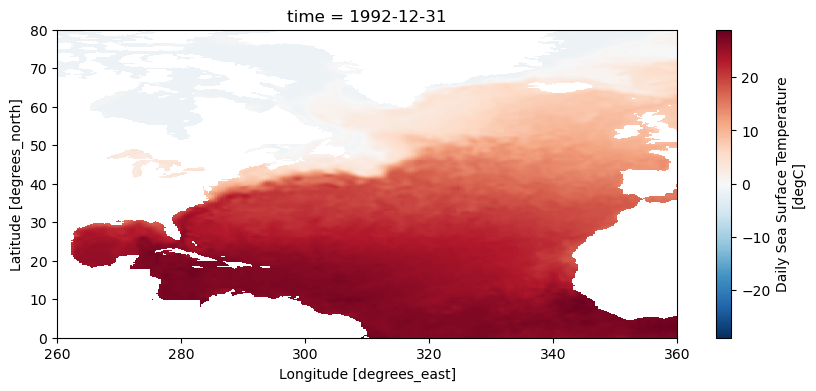

In [134]:
sst2 = sst.where( (sst.lat>9.85) | (sst.lon>283) ).where( (sst.lat>17.85) | (sst.lon>275),drop='true')
sst2[-1,:,:].plot()

In [149]:
msc_ln = (sst.lat>9.85) | (sst.lon>283) 
msc_lt = (sst.lat>17.85) | (sst.lon>275)

In [150]:
Ca_ds = DS.where(msc_ln &  msc_lt, drop=True)

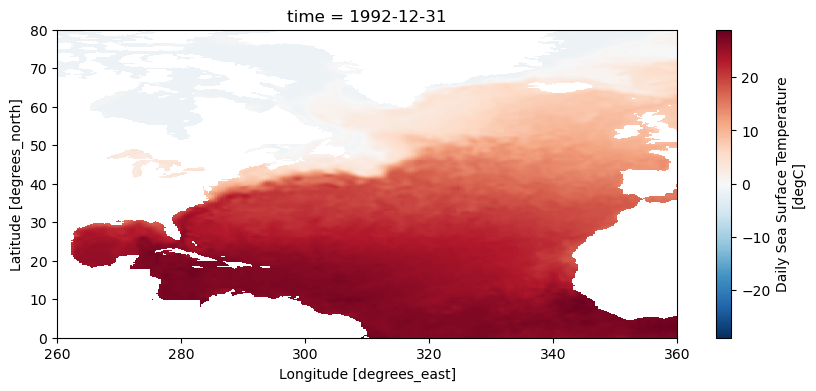

In [151]:
Ca_ds.sst[-1,:,:].plot()

In [124]:
min_lon = -24.995
min_lat = 25.05
max_lon = 45.50
max_lat = 71.55

mask_lon = (DS.lon >= min_lon) & (DS.lon <= max_lon)

In [125]:
mask_lon

<xarray.DataArray 'lon' (lon: 1440)>
array([ True,  True,  True, ..., False, False, False])
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9

In [ ]:
sst2.isel(time=-1).plot()

In [86]:
a = xr.DataArray(np.arange(25).reshape(5, 5), dims=("x", "y"))

In [99]:
a.where(a.x<2,a)==np.nan

<xarray.DataArray (x: 5, y: 5)>
array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])
Dimensions without coordinates: x, y

In [ ]:
min_lon = -24.995
min_lat = 25.05
max_lon = 45.50
max_lat = 71.55

mask_lon = (DS.lon >= min_lon) & (DS.lon <= max_lon)
mask_lat = (DS.lat >= min_lat) & (DS.lat <= max_lat)

In [ ]:
cropped_ds = DS.where(mask_lon & mask_lat)

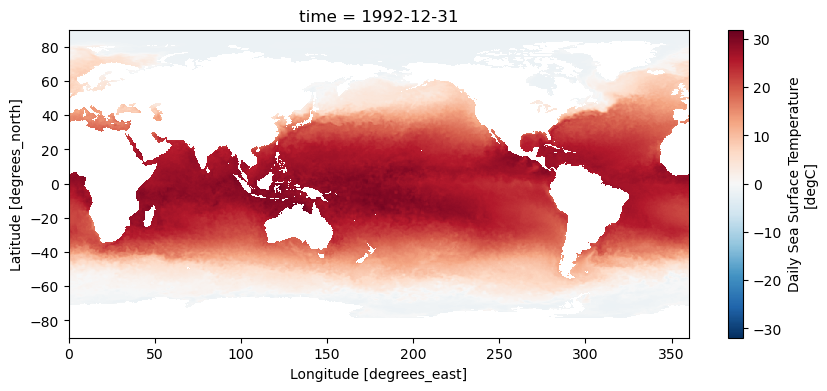

In [ ]:
DS.sst.isel(time=-1).plot()

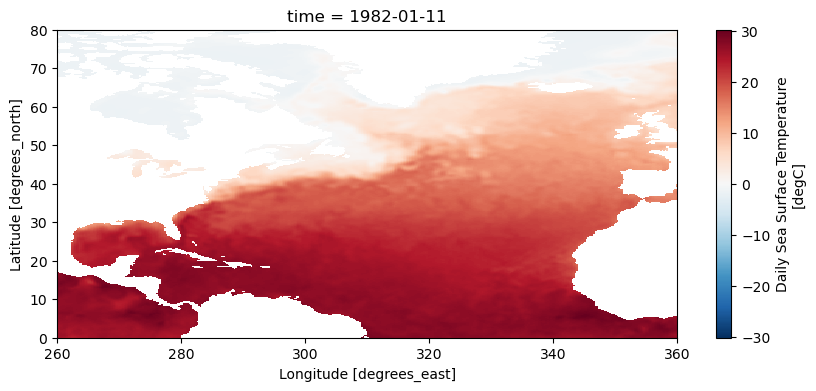

In [40]:
sst[10,:,:].plot()

In [4]:
#Titulos = ['Oceano Global','Hemisferio norte','Hemisferio sur','AtlanticoNorte']
#Titulos_short = ['GO','NH','SH','NAtl']

Titulos = ['AtlanticoNorte']
Titulos_short = ['NAtl']

print('>>>>> Cargando ficheros de ')

for i in range(0,len(Titulos)):
    titulo = Titulos[i]
    titulo_short = Titulos_short[i]
        
    if titulo_short=='GO' or titulo_short=='NAtl':
        print('>>>>> '+titulo)        
        

>>>>> Cargando ficheros de 
>>>>> AtlanticoNorte
